# **Theoretical**

1. What is Logistic Regression, and how does it differ from Linear Regression?
  -  Logistic Regression is a statistical method for binary classification that predicts the probability of a class label (0 or 1).
  - Linear Regression predicts a continuous output, while logistic regression uses the sigmoid function to constrain the output between 0 and 1.

2.  What is the mathematical equation of Logistic Regression?
   - The hypothesis function is:
   - hθ(x)= 1/1+e^-0tx
   - This is the sigmoid function applied to the linear combination of inputs and weights.

3. Why do we use the Sigmoid function in Logistic Regression?
   - The sigmoid function maps real-valued inputs to the range (0, 1), making it ideal for interpreting output as probabilities.
   - σ(z)= 1/1+e^-z

4. What is the cost function of Logistic Regression?
   - The log loss (binary cross-entropy) is used:
   - J
​(θ)
​​ =−
​m
​
​1
​​ [
​i=1
​∑
​m
​​ y
​(i)
​​ log(h
​θ
​​ (x
​(i)
​​ )+(1−y
​(i)
​​ )log(1−h
​θ
​​ (x
​(i)
​​ ))]

5. What is Regularization in Logistic Regression? Why is it needed?
   - Regularization adds a penalty to the cost function to prevent overfitting. Common types:

- L1 (Lasso): promotes sparsity

- L2 (Ridge): reduces coefficient magnitudes

6.  Explain the difference between Lasso, Ridge, and Elastic Net regression?
   - Ridge Regression (L2 Penalty): Adds a penalty based on the square of the coefficients. It shrinks coefficients towards zero but never exactly to zero, keeping all features. Excellent for handling multicollinearity by shrinking correlated features together.

- Lasso Regression (L1 Penalty): Adds a penalty based on the absolute value of the coefficients. It can shrink coefficients exactly to zero, performing automatic feature selection by effectively removing less important features. Can be unstable with highly correlated features (tends to pick one).

- Elastic Net Regression (L1 + L2 Penalty): Combines both Lasso and Ridge penalties. It offers the feature selection of Lasso and the multicollinearity handling of Ridge. It tends to select groups of correlated features together, overcoming Lasso's limitation in such cases.

7. When should we use Elastic Net instead of Lasso or Ridge?
   - When you suspect multiple correlated features and want to combine L1 and L2 regularization.

- Elastic Net can select features like Lasso and shrink them like Ridge

8.  What is the impact of the regularization parameter (λ) in Logistic Regression?
   - High λ → More regularization → Smaller coefficients

- Low λ → Less regularization → Model may overfit

In scikit-learn, this is controlled using C = 1/λ.

9. What are the key assumptions of Logistic Regression?
   - Linearity of log-odds with independent variables
- No multicollinearity among predictors
- Large sample size
- Independent observations

10. What are some alternatives to Logistic Regression for classification tasks?
   - Decision Trees
- Random Forest
- SVM (Support Vector Machines)
- Naive Bayes
- Gradient Boosting (XGBoost, LightGBM)

11. What are Classification Evaluation Metrics?
   - Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC
- Confusion Matrix
- Cohen’s Kappa
- MCC

12. How does class imbalance affect Logistic Regression?
   - Leads to bias toward majority class

- Accuracy becomes misleading

Use:

class_weight='balanced'

Oversampling (SMOTE)

Precision-Recall metrics

13.  What is Hyperparameter Tuning in Logistic Regression?
   - It's the process of optimizing model parameters like:

- C (regularization strength)
- penalty ('l1', 'l2', 'elasticnet')
- solver

Common methods: GridSearchCV, RandomizedSearchCV

14.  What are different solvers in Logistic Regression? Which one should be used?
   - Solvers in Logistic Regression are algorithms that find the optimal model coefficients. Here are the common ones and their typical uses:

- 'liblinear': Good for small to medium datasets, supports L1 (feature selection) and L2 regularization.
- 'lbfgs': The default and generally good all-rounder for medium to large datasets, supports L2 regularization.
- 'newton-cg': Similar to 'lbfgs' but can be slower, supports L2.
- 'sag': Faster for very large datasets with L2 regularization, requires feature scaling.
- 'saga': Best for very large datasets as it supports L1, L2, and Elastic Net, also benefits greatly from feature scaling.

Which to use:

- For general cases, start with 'lbfgs'.

- If you need L1 regularization (feature selection), choose 'liblinear' (for smaller data) or 'saga' (for larger data).

- For very large datasets (especially with Elastic Net), 'saga' is usually the best choice, but remember to scale your features

15.  How is Logistic Regression extended for multiclass classification?
   - Two main strategies:

- One-vs-Rest (OvR) – default in scikit-learn

- Multinomial (Softmax Regression) – with multi_class='multinomial' and solver like lbfgs

16. What are the advantages and disadvantages of Logistic Regression?
   - Advantages:

- Easy to implement and interpret

- Probabilistic outputs

- Fast training

Disadvantages:

- Assumes linear decision boundary

- Sensitive to multicollinearity

- Struggles with complex data patterns

17. What are some use cases of Logistic Regression?
   - Spam detection

- Credit scoring

- Customer churn prediction

- Medical diagnosis

- Click-through rate prediction

18.  What is the difference between Softmax Regression and Logistic Regression?
   - Logistic Regression: binary classification using sigmoid

- Softmax Regression: multiclass classification using softmax function

Softmax outputs a probability distribution over multiple classes.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
   - Use Softmax (multinomial) for balanced multiclass problems

Use OvR when:

- Binary classifiers perform better

- Data is sparse or unbalanced

20. How do we interpret coefficients in Logistic Regression?
   - Each coefficient 0i represents the log-odds change in the target for a unit increase in xi, keeping other variables constant.
   - Odds ratio = e^0i
   - Positive → increases odds

- Negative → decreases odds

# **Practical**

In [40]:
# 1.  Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
   # Regression, and prints the model accuracy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.96


In [41]:
# 2.  Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
#     and print the model accuracy


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale data (important for L1 regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# L1 Regularized Logistic Regression
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)

# Predict and evaluate
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

print(f"L1 Regularized Model Accuracy: {accuracy_l1:.2f}")


L1 Regularized Model Accuracy: 0.97


In [42]:
# 3.  Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
#     LogisticRegression(penalty='l2'). Print model accuracy and coefficients


# L2 Regularized Logistic Regression
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(X_train, y_train)

# Predict and evaluate
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

print(f"L2 Regularized Model Accuracy: {accuracy_l2:.2f}")
print("Model Coefficients:")
print(model_l2.coef_)


L2 Regularized Model Accuracy: 0.97
Model Coefficients:
[[-0.41791087 -0.39754156 -0.38086516 -0.47805053 -0.05755453  0.53609039
  -0.81998261 -1.11710283  0.24152876  0.05833728 -1.26288337  0.18834546
  -0.59574739 -0.9480631  -0.32281552  0.68606654  0.17908305 -0.29745712
   0.49210935  0.59179367 -0.87580453 -1.34818801 -0.58827723 -0.86907165
  -0.54602135  0.00258319 -0.95001734 -0.77533547 -1.1884736  -0.1693959 ]]


In [43]:
# 4.  Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

 # Elastic Net requires 'saga' solver
model_elastic = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=5000)
model_elastic.fit(X_train, y_train)

# Predict and evaluate
y_pred_elastic = model_elastic.predict(X_test)
accuracy_elastic = accuracy_score(y_test, y_pred_elastic)

print(f"Elastic Net Model Accuracy: {accuracy_elastic:.2f}")



Elastic Net Model Accuracy: 0.97


In [44]:
# 5.  Write a Python program to train a Logistic Regression model for multiclass classification using
#     multi_class='ovr'

from sklearn.datasets import load_iris

# Load multiclass dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train Logistic Regression with OvR
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ovr.fit(X_train, y_train)

# Predict and evaluate
y_pred_ovr = model_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

print(f"Multiclass (OvR) Accuracy: {accuracy_ovr:.2f}")


Multiclass (OvR) Accuracy: 0.97


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [45]:
# 6.  Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
#     Regression. Print the best parameters and accuracy

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print(f"Best Accuracy: {grid.best_score_:.2f}")


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.96


In [46]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
#    average accuracy

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5)
model = LogisticRegression(max_iter=10000)

scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean():.2f}")


Cross-Validation Scores: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Average Accuracy: 0.98


In [47]:
# 8.  Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
#     accuracy.

# Create a dummy CSV for demonstration
data = {'feature1': [1, 2, 3, 4, 5],
        'feature2': [6, 7, 8, 9, 10],
        'target': [0, 1, 0, 1, 0]}
dummy_df = pd.DataFrame(data)
dummy_df.to_csv('your_dataset.csv', index=False)


# Load from CSV
data = pd.read_csv('your_dataset.csv')  # Replace with actual path
X = data.drop('target', axis=1)  # Replace 'target' with actual target column name
y = data['target']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


In [48]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
#    Logistic Regression. Print the best parameters and accuracy

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Randomized Search CV
random_search = RandomizedSearchCV(LogisticRegression(max_iter=10000), param_distributions=param_dist, n_iter=10, cv=2, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print(f"Best Accuracy: {random_search.best_score_:.2f}")

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.08858667904100823)}
Best Accuracy: 0.50


In [49]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

#from sklearn.multiclass import OneVsOneClassifier

# One-vs-One Multiclass Logistic Regression
#ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=10000))
#ovo_model.fit(X_train, y_train)

from sklearn.multiclass import OneVsOneClassifier

ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=10000))
ovo_model.fit(X_train, y_train)
accuracy_ovo = ovo_model.score(X_test, y_test)

print(f"OvO Accuracy: {accuracy_ovo:.2f}")


OvO Accuracy: 0.00


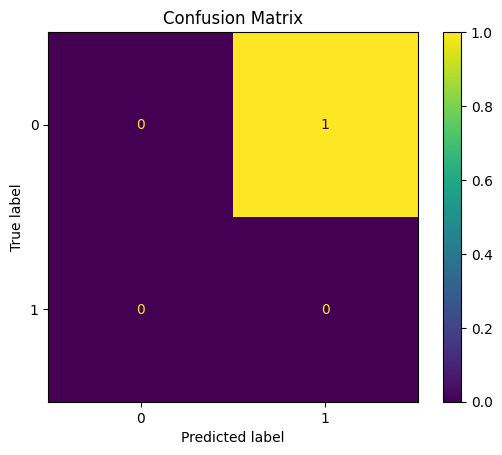

In [50]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
#     classification

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [51]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
#     Recall, and F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
# 13.  Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
#      improve model performance

imbalanced_model = LogisticRegression(class_weight='balanced', max_iter=10000)
imbalanced_model.fit(X_train, y_train)
y_pred_imb = imbalanced_model.predict(X_test)

print("Accuracy (Imbalanced):", accuracy_score(y_test, y_pred_imb))


Accuracy (Imbalanced): 0.0


In [53]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
#     evaluate performance

import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.dropna(subset=['age', 'embarked', 'fare'], inplace=True)
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = titanic[['age', 'fare', 'sex', 'embarked']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

print("Titanic Accuracy:", model.score(X_test, y_test))


Titanic Accuracy: 0.7692307692307693


In [54]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
#     model. Evaluate its accuracy and compare results with and without scaling

# Without scaling
model = LogisticRegression()
model.fit(X_train, y_train)
acc_unscaled = model.score(X_test, y_test)

# With scaling
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_scaled_train, y_train)
acc_scaled = model_scaled.score(X_scaled_test, y_test)

print(f"Unscaled Accuracy: {acc_unscaled:.2f}")
print(f"Scaled Accuracy: {acc_scaled:.2f}")


Unscaled Accuracy: 0.77
Scaled Accuracy: 0.77


In [55]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_proba)

print("ROC-AUC Score:", roc_score)


ROC-AUC Score: 0.8235414116687065


In [56]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
#     accuracy

model_custom_C = LogisticRegression(C=0.5)
model_custom_C.fit(X_train, y_train)
print("Custom C Accuracy:", model_custom_C.score(X_test, y_test))


Custom C Accuracy: 0.7692307692307693


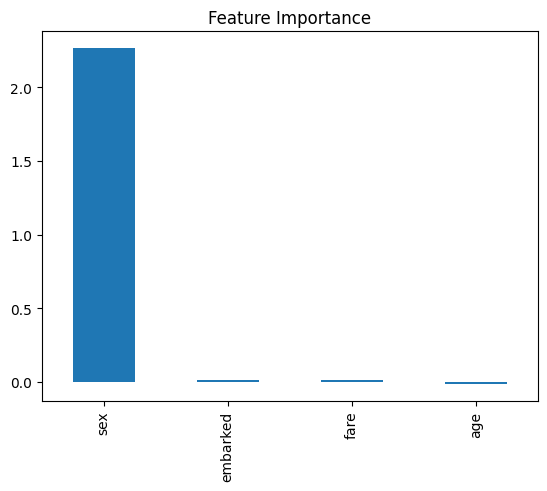

In [57]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model
#     coefficients

importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()


In [58]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
#     Score

from sklearn.metrics import cohen_kappa_score

y_pred = model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa Score:", kappa)



Cohen's Kappa Score: 0.5200854266246313


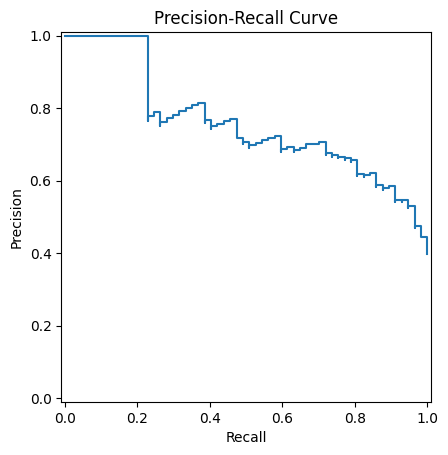

In [59]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
#     classification

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, y_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()



In [60]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
#     their accuracy


solvers = ['liblinear', 'saga', 'lbfgs']
for s in solvers:
    model = LogisticRegression(solver=s, max_iter=10000)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Solver: {s} => Accuracy: {acc:.2f}")



Solver: liblinear => Accuracy: 0.77
Solver: saga => Accuracy: 0.73
Solver: lbfgs => Accuracy: 0.77


In [61]:
# 22.  Write a Python program to train Logistic Regression and evaluate its performance using Matthews
#      Correlation Coefficient (MCC).

from sklearn.metrics import matthews_corrcoef

y_pred = model.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)

print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.5201404330699525


In [62]:
# 23.  Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
#      accuracy to see the impact of feature scaling

model_raw = LogisticRegression()
model_raw.fit(X_train, y_train)
acc_raw = model_raw.score(X_test, y_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_scaled_train, y_train)
acc_scaled = model_scaled.score(X_scaled_test, y_test)

print(f"Raw Accuracy: {acc_raw:.2f}")
print(f"Standardized Accuracy: {acc_scaled:.2f}")


Raw Accuracy: 0.77
Standardized Accuracy: 0.77


In [63]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
#     cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and scale the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C_values = [0.01, 0.1, 1, 10, 100]
for c in C_values:
    model = LogisticRegression(C=c, max_iter=10000)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"C={c} => CV Accuracy: {scores.mean():.2f}")

C=0.01 => CV Accuracy: 0.95
C=0.1 => CV Accuracy: 0.98
C=1 => CV Accuracy: 0.98
C=10 => CV Accuracy: 0.97
C=100 => CV Accuracy: 0.96


In [64]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
#     make predictions.

import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


# Save
joblib.dump(model, 'logistic_model.pkl')

# Load
loaded_model = joblib.load('logistic_model.pkl')
accuracy_loaded = loaded_model.score(X_test, y_test)
print("Accuracy (Loaded Model):", accuracy_loaded)

Accuracy (Loaded Model): 0.956140350877193
